
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.


# 1. Import and explore the framingham.csv dataset.

##  Import Required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset :

In [2]:
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.shape

(4240, 16)

In [9]:
df.ndim

2

In [11]:
df.size

67840

In [12]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [13]:
df.empty

False

In [14]:
df.min

<bound method NDFrame._add_numeric_operations.<locals>.min of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   

In [15]:
df.max

<bound method NDFrame._add_numeric_operations.<locals>.max of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   

In [16]:
df.median

<bound method NDFrame._add_numeric_operations.<locals>.median of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97

In [17]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97  

In [18]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [19]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# 2. Clean the data (handle nulls, correct formats, etc.).

## Fill missing values with mean (or mode for categorical) :

In [20]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [21]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [22]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

In [23]:
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [24]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)


In [25]:
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [26]:
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [27]:
# Check for nulls again
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# 3. Visualize the distribution of glucose and related health indicators

## Exploratory Data Analysis (EDA):


Text(0.5, 1.0, 'Distribution of Glucose Levels')

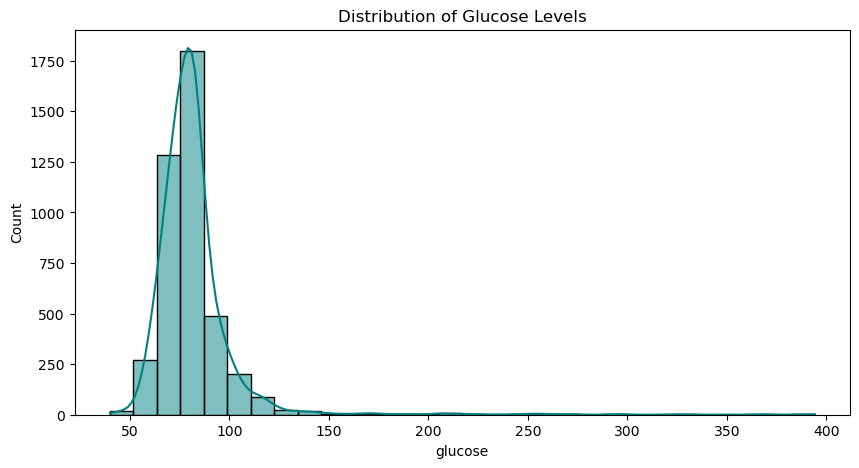

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['glucose'], bins=30, kde=True, color='teal')
plt.title("Distribution of Glucose Levels")

##  Plot Related Health Indicators:

### Plot: BMI Distribution

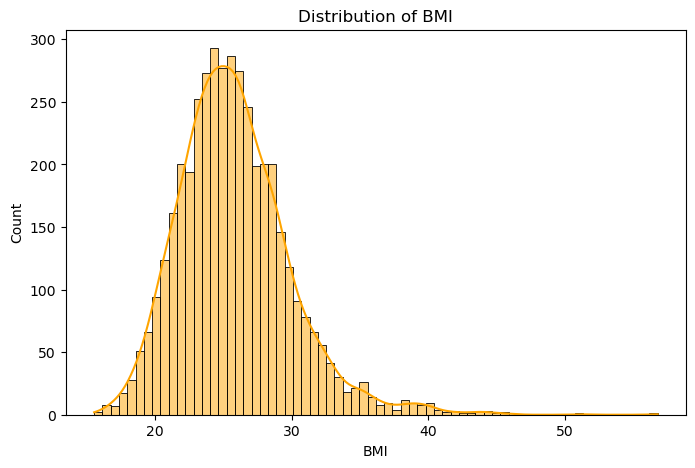

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], kde=True, color='orange')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

### Plot: Age Distribution

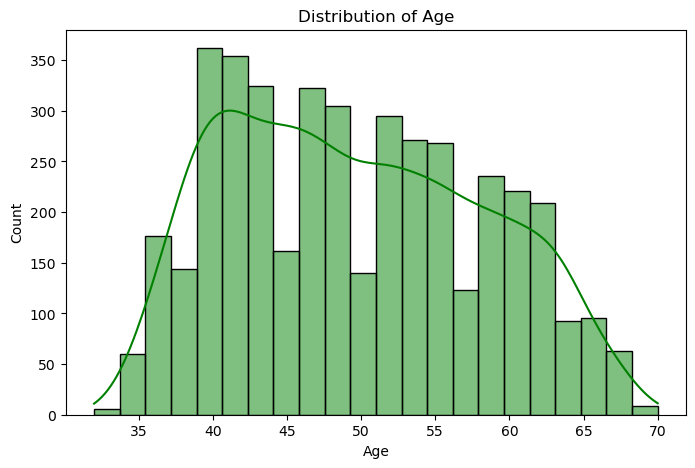

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='green')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Boxplot: Glucose by Age Group

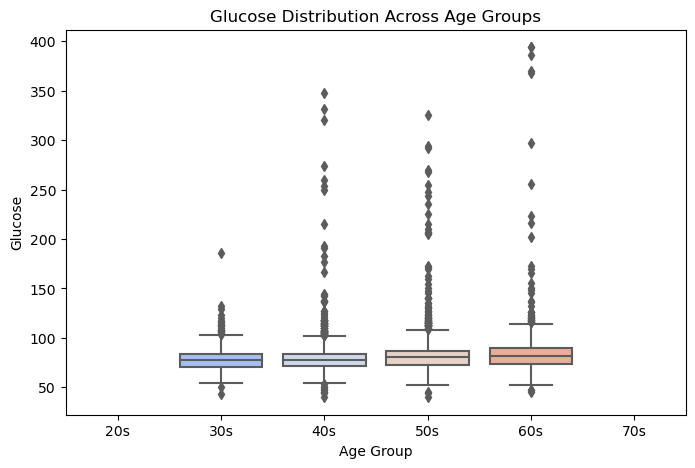

In [33]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20s", "30s", "40s", "50s", "60s", "70s"])
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='glucose', data=df, palette='coolwarm')
plt.title("Glucose Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Glucose")
plt.show()

### Pair Plot to See Relationships

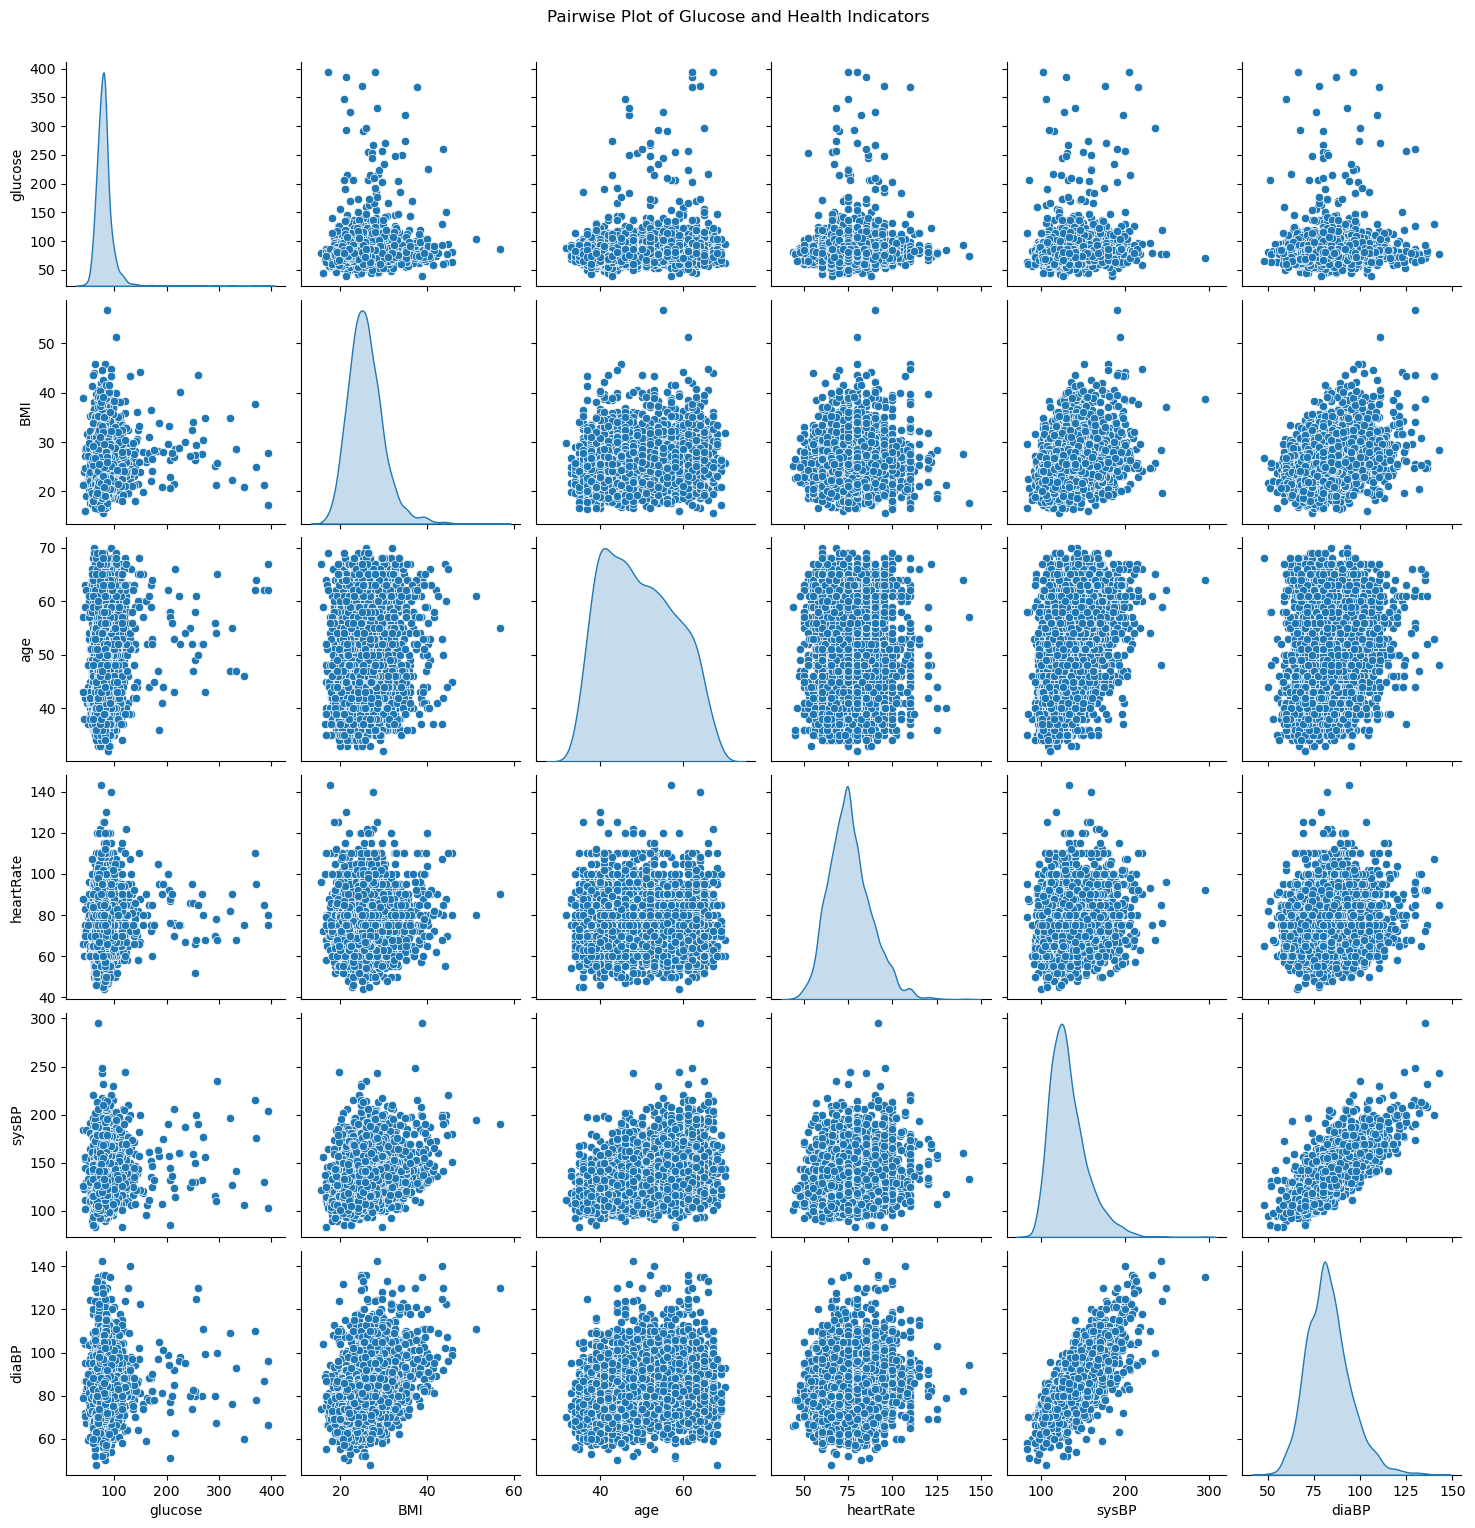

In [35]:
sns.pairplot(df[['glucose', 'BMI', 'age', 'heartRate', 'sysBP', 'diaBP']], diag_kind='kde')
plt.suptitle("Pairwise Plot of Glucose and Health Indicators", y=1.02)
plt.show()

# 4. Perform feature selection and engineering

### One-Hot Encode the Categorical :

In [36]:
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # or use df.fillna(df.mean()) to fill


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_group          0
dtype: int64


In [39]:
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

### Correlation Matrix for Feature Selection :

Correlation with Glucose:
 glucose            1.000000
diabetes           0.605709
sysBP              0.134561
TenYearCHD         0.120451
age                0.116951
heartRate          0.089379
age_group_60s      0.088890
prevalentHyp       0.082757
BMI                0.082123
diaBP              0.058499
BPMeds             0.048876
age_group_50s      0.045421
totChol            0.044710
prevalentStroke    0.018065
male               0.005718
education         -0.034416
currentSmoker     -0.054062
age_group_40s     -0.055099
cigsPerDay        -0.056583
age_group_30s     -0.064922
age_group_70s           NaN
Name: glucose, dtype: float64


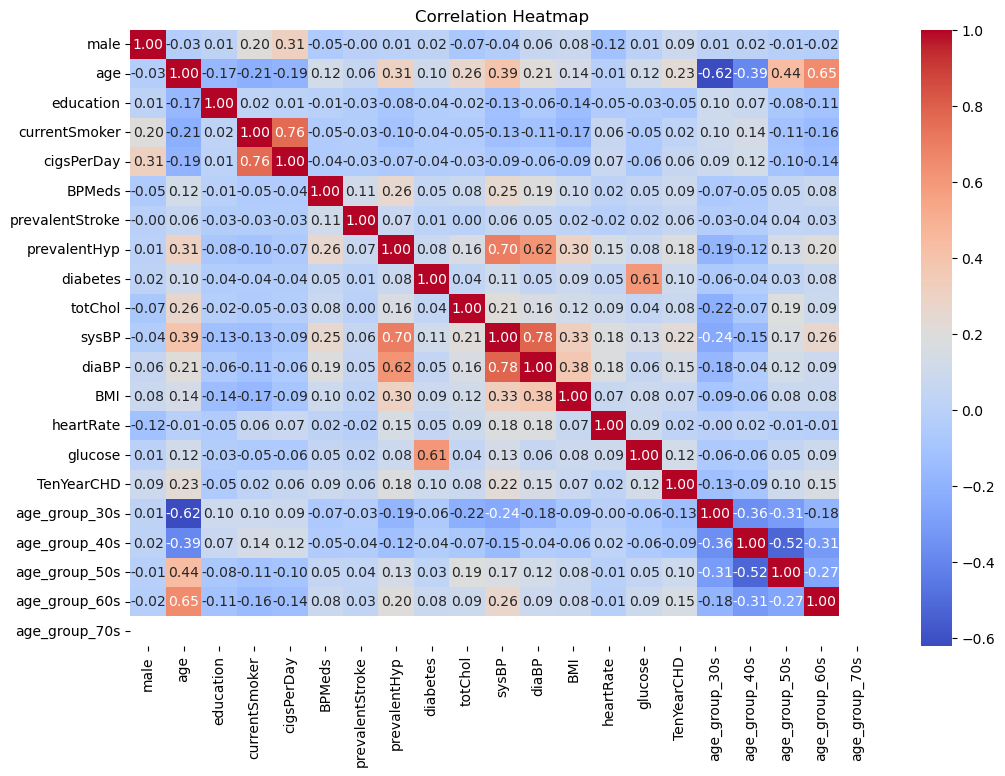

In [40]:
# Correlation matrix
corr = df.corr()

# Correlation with glucose
glucose_corr = corr['glucose'].sort_values(ascending=False)
print("Correlation with Glucose:\n", glucose_corr)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Select Final Feature Set :

In [45]:
selected_features = [
    'age', 'BMI', 'sysBP', 'diaBP', 'heartRate',
    'diabetes', 'prevalentHyp', 'totChol',
    'age_group_30s', 'age_group_40s', 'age_group_50s',
    'age_group_60s', 'age_group_70s'
]

X = df[selected_features]
y = df['glucose']


In [46]:
print(X.shape)  # Output: (n_rows, 13)
print(y.shape)  # Output: (n_rows,)

(4240, 13)
(4240,)


### Feature Scaling :

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
print(pd.DataFrame(X_scaled, columns=selected_features).head())


        age       BMI     sysBP     diaBP  heartRate  diabetes  prevalentHyp  \
0 -1.234283  0.287258 -1.196267 -1.083027   0.342792 -0.162437     -0.671241   
1 -0.417664  0.719668 -0.515399 -0.159355   1.590451 -0.162437     -0.671241   
2 -0.184345 -0.113213 -0.220356 -0.243325  -0.073094 -0.162437     -0.671241   
3  1.332233  0.682815  0.800946  1.016227  -0.904866 -0.162437      1.489778   
4 -0.417664 -0.663554 -0.106878  0.092555   0.758678 -0.162437     -0.671241   

    totChol  age_group_30s  age_group_40s  age_group_50s  age_group_60s  \
0 -0.940825       2.160659       -0.78202       -0.66644      -0.397685   
1  0.300085      -0.462822        1.27874       -0.66644      -0.397685   
2  0.187275      -0.462822        1.27874       -0.66644      -0.397685   
3 -0.263965      -0.462822       -0.78202       -0.66644       2.514552   
4  1.089756      -0.462822        1.27874       -0.66644      -0.397685   

   age_group_70s  
0            0.0  
1            0.0  
2          

### Feature Importance using Random Forest :

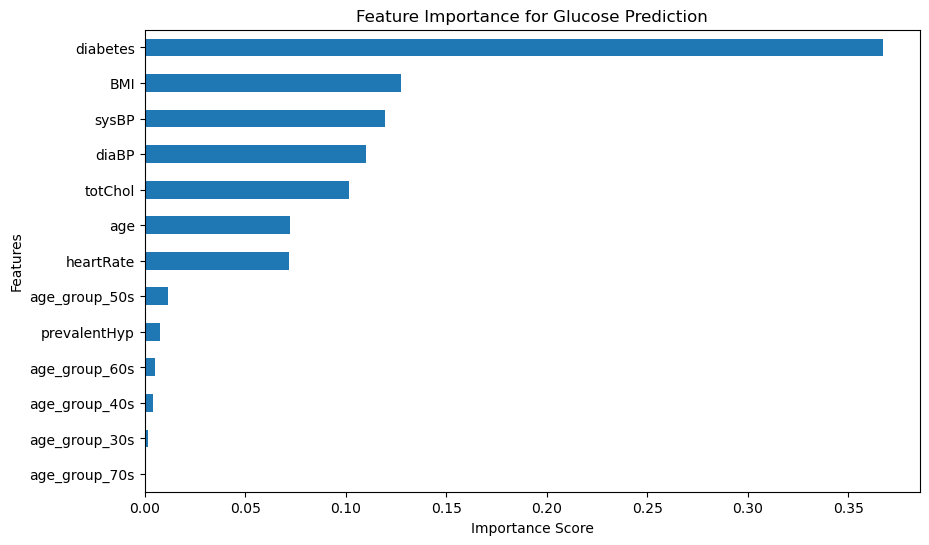

In [49]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values()

importances.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance for Glucose Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest)

## Logistic Regression :

In [57]:
# 6. Feature Engineering

# Create binary glucose level (1 = high glucose, 0 = normal)
threshold = 100
df['high_glucose'] = (df['glucose'] > threshold).astype(int)

# Drop 'glucose' as it's used to create the target
df.drop('glucose', axis=1, inplace=True)


In [58]:
# 7. Split Data

X = df.drop('high_glucose', axis=1)
y = df['high_glucose']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [64]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

=== Logistic Regression ===
Accuracy: 0.9398584905660378
Confusion Matrix:
 [[784   3]
 [ 48  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       787
           1       0.81      0.21      0.34        61

    accuracy                           0.94       848
   macro avg       0.88      0.60      0.65       848
weighted avg       0.93      0.94      0.92       848



## Decision Tree :

In [65]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [66]:
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))
print("Classification Report:\n", classification_report(y_test, tree_pred))

=== Decision Tree ===
Accuracy: 0.8832547169811321
Confusion Matrix:
 [[731  56]
 [ 43  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       787
           1       0.24      0.30      0.27        61

    accuracy                           0.88       848
   macro avg       0.59      0.61      0.60       848
weighted avg       0.89      0.88      0.89       848



## Random Forest :

In [68]:
# 1. Import model
from sklearn.ensemble import RandomForestClassifier

# 2. Train the Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# 3. Predict
forest_pred = forest_model.predict(X_test)


In [69]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

In [70]:
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, forest_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_pred))
print("Classification Report:\n", classification_report(y_test, forest_pred))

=== Random Forest ===
Accuracy: 0.9398584905660378
Confusion Matrix:
 [[784   3]
 [ 48  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       787
           1       0.81      0.21      0.34        61

    accuracy                           0.94       848
   macro avg       0.88      0.60      0.65       848
weighted avg       0.93      0.94      0.92       848



# 7.  Evaluate models using classification metrics

In [74]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,TenYearCHD,age_group_30s,age_group_40s,age_group_50s,age_group_60s,age_group_70s,high_glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,...,70.0,26.97,80.0,0,True,False,False,False,False,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,...,81.0,28.73,95.0,0,False,True,False,False,False,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,...,80.0,25.34,75.0,0,False,True,False,False,False,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,...,95.0,28.58,65.0,1,False,False,False,True,False,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,...,84.0,23.10,85.0,0,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,...,72.0,22.00,84.0,0,False,True,False,False,False,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,...,87.0,19.16,86.0,0,False,True,False,False,False,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,...,83.0,21.47,80.0,0,False,False,True,False,False,1
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,...,98.0,25.60,67.0,0,True,False,False,False,False,0


In [75]:
print(df.columns)


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'TenYearCHD', 'age_group_30s',
       'age_group_40s', 'age_group_50s', 'age_group_60s', 'age_group_70s',
       'high_glucose'],
      dtype='object')


In [77]:
def glucose_class(g):
    if g < 80:
        return 0  # Low
    elif g < 126:
        return 1  # Normal
    else:
        return 2  # High

df['glucose_class'] = df['high_glucose'].apply(glucose_class)


In [78]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
            'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
            'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'TenYearCHD']

X = df[features]
y = df['glucose_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       848

    accuracy                           1.00       848
   macro avg       1.00      1.00      1.00       848
weighted avg       1.00      1.00      1.00       848


Confusion Matrix:
 [[848]]


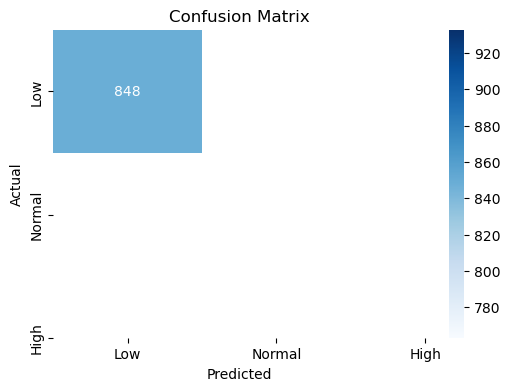

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Normal', 'High'], yticklabels=['Low', 'Normal', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 7. Predict Glucose Levels and Draw Insights

In [82]:
# Recreate X and y after final cleaning and feature engineering
X = df.drop('high_glucose', axis=1)
y = df['high_glucose']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Now predict
y_pred = forest_model.predict(X_test_scaled)
y_proba = forest_model.predict_proba(X_test_scaled)[:, 1]


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9009433962264151
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       787
           1       0.15      0.08      0.11        61

    accuracy                           0.90       848
   macro avg       0.54      0.52      0.53       848
weighted avg       0.88      0.90      0.89       848

Confusion Matrix:
 [[759  28]
 [ 56   5]]


# 8. Visualize Model’s Important Features & Performance

### 1. Random Forest :

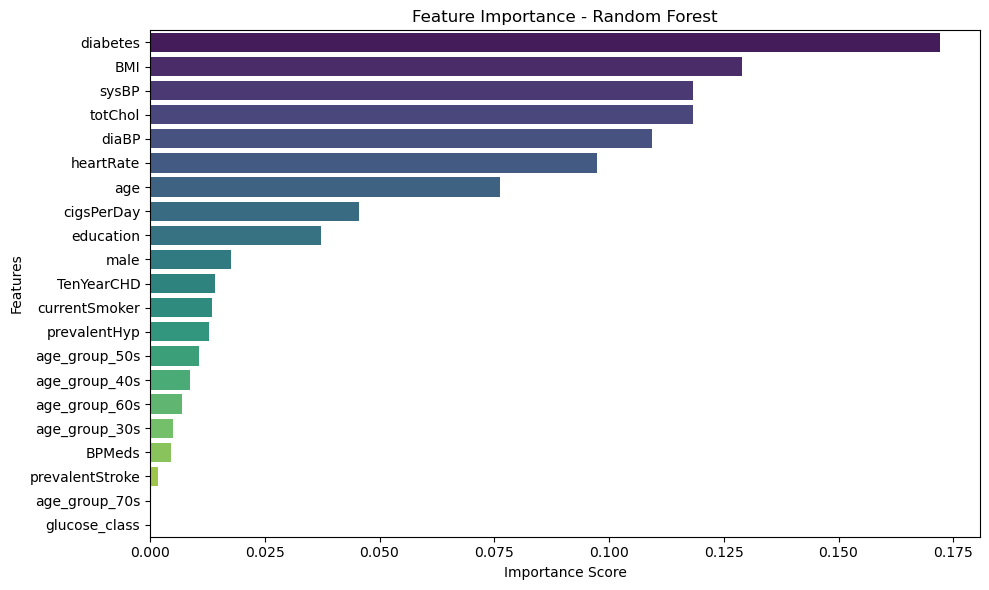

In [87]:
importances = forest_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


###  2.Confusion Matrix

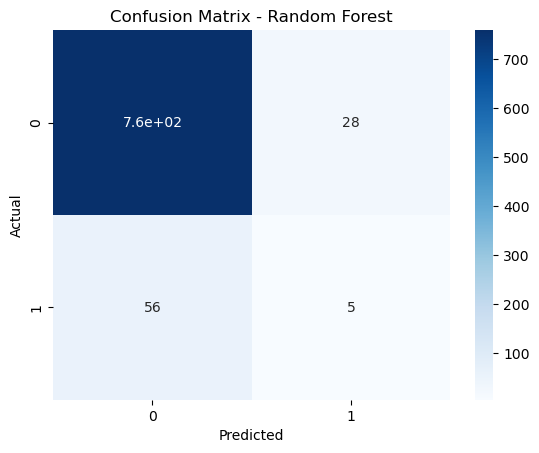

In [85]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 3. ROC Curve 

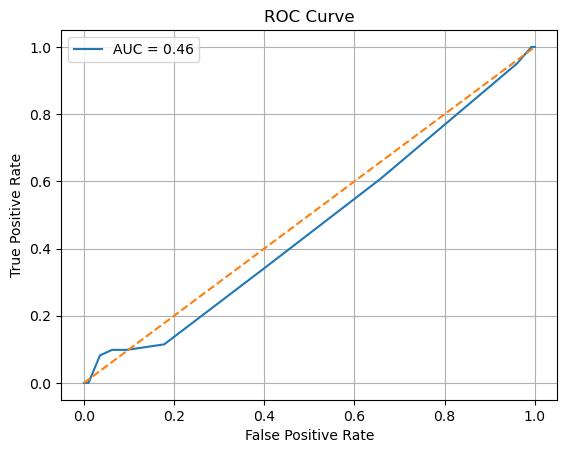

In [86]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.
